# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [41]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned OFF


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

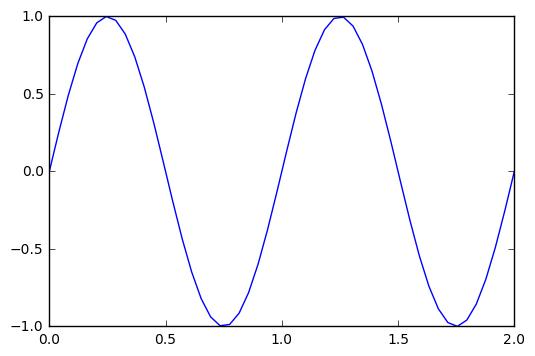

In [42]:


x = np.sin(2 * np.pi * 1 * t)
    
plt.figure()
plt.plot(t,x)

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

In [43]:
def sin_fn(n,fs):
    x = np.arange(n)
    s = np.sin(2*np.pi * x / fs)
      
    return s #...


<Container object of 3 artists>

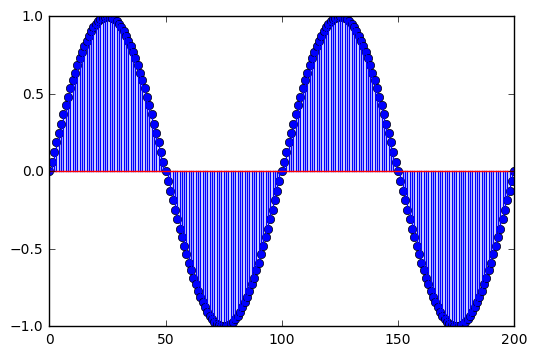

In [44]:
plt.stem(sin_fn(201,100))

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

<Container object of 3 artists>

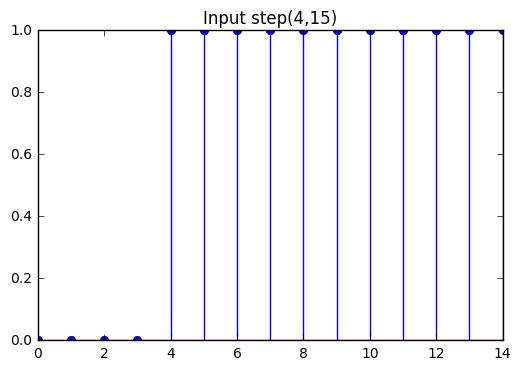

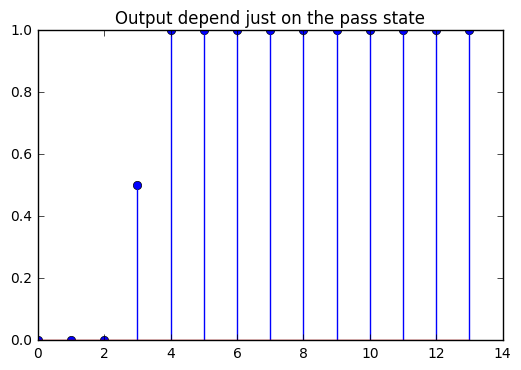

In [46]:

def step(n=0, N=20):
    if n < 0 or n > N-1:
        raise NameError('n should be in range [0, N-1]')
        return
    
    step_seq = np.zeros((N,1))
    step_seq[n:N] = np.ones((N-n,1))
    
    return step_seq

def system(x):
    for k in range(0,x.size-1):
        y[k] = (x[k] + x[k+1])/2
    
    return y #Remove last value 
        
x = step(4, 15)

y = system(x)

plt.figure()
plt.title("Input step(4,15)")
plt.stem(x)
plt.figure()
plt.title("Output depend just on the pass state")
plt.stem(y)

**1.2** Propose a modification to obtain a causal version

<Container object of 3 artists>

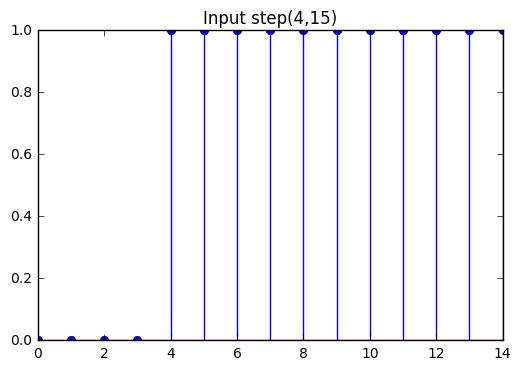

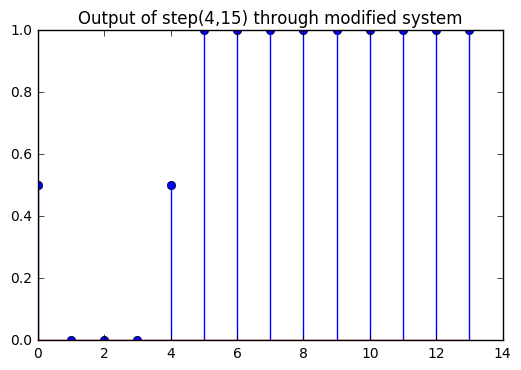

In [52]:
def mod_system(x):
    for k in range(0,x.size-1):
        y[k] = (x[k-1] + x[k])/2
    
    return y #Remove last value 

x = step(4, 15)

y = mod_system(x)

plt.figure()
plt.title("Input step(4,15)")
plt.stem(x)
plt.figure()
plt.title("Output of step(4,15) through modified system")
plt.stem(y)

Comments on your observations

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



In [54]:
def prim(c):
    acum = c.copy()
    
    for i in range(1,acum.size):
        acum[i] += acum[i-1]
    
    return acum[1:]

<Container object of 3 artists>

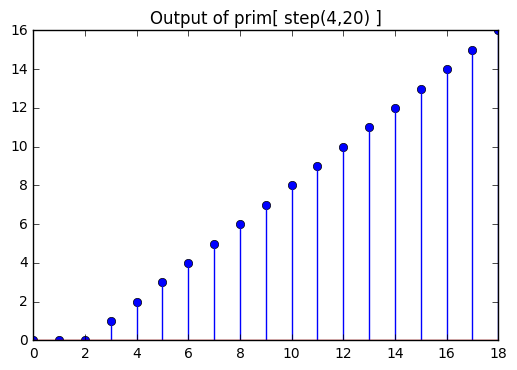

In [61]:
x = step(4,20)

y = prim(x)

plt.figure()
plt.title("Output of prim[ step(4,20) ]")
plt.stem(y)


In [ ]:
# it will not tend to infinite because for a limited input I always have limited output

**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

<Container object of 3 artists>

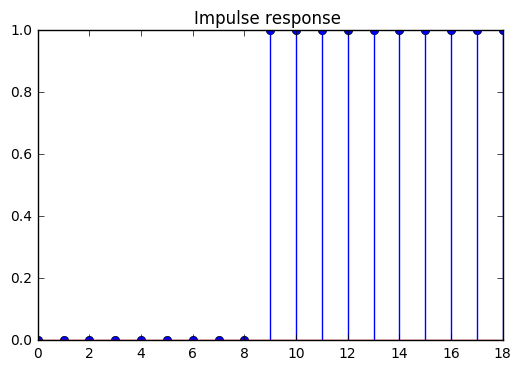

In [62]:
def dirac(n=0, N=20):
    if n < 0 or n > N-1:
        raise NameError('n should be in range [0, N-1]')
        return
    
    dirac_seq = np.zeros((N))
    dirac_seq[n] = 1 
    
    return dirac_seq

imp_primitive = prim(dirac(n=10,N=20))

plt.figure()
plt.title("Impulse response ")
plt.stem(imp_primitive)

In [ ]:
#the impulse response of the primitive operator it will be a step because we just add one at one point.

**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

<Container object of 3 artists>

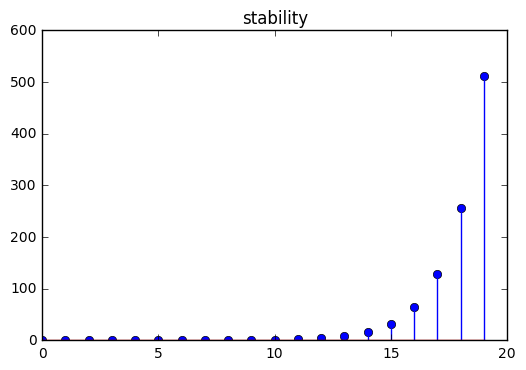

In [65]:
def stab(x):
    y = x.copy();
    
    for k in range(1,y.size):
        y[k] = x[k] + 2*y[k-1]

    return y

imp_stab= stab(dirac(n=10,N=20))

plt.figure()
plt.title("stability")
plt.stem(imp_stab)
        


In [ ]:
#we can see that with the time it will go to infinite, is not bounded

**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

<Container object of 3 artists>

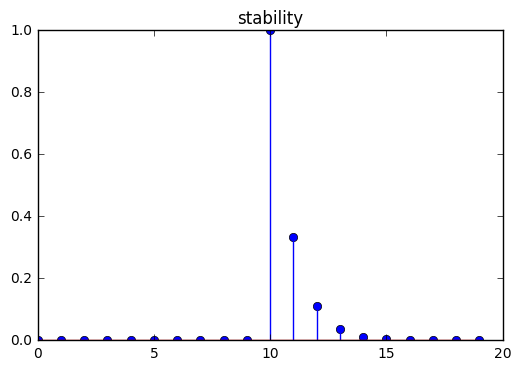

In [78]:
def stab1(x):
    y = x.copy();
    
    for k in range(0,x.size):
        y[k] = x[k] + y[k-1]/3

    return y

imp_stab1= stab1(dirac(n=10,N=20))

plt.figure()
plt.title("stability")
plt.stem(imp_stab1)
        

In [ ]:
#it tend to zero with the time so the system is boundend

Comments your observations

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


<Container object of 3 artists>

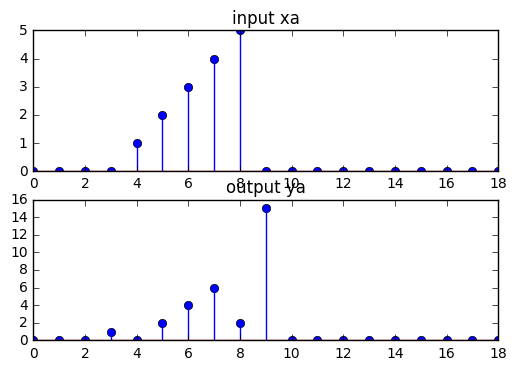

In [92]:
xa=np.array([0,0,0,0,1,2,3,4,5,0,0,0,0,0,0,0,0,0,0])
xb=np.array([0,0,0,0,0,0,0,0,0,4,3,2,1,0,0,0,0,0,0])

def resp3(x):
    y = x.copy();
    
    for k in range(1,x.size-1):
        y[k] = 3*x[k-1] - 2*x[k] + x[k+1]

    return y

ya = resp3(xa)
plt.figure()
plt.subplot(2,1,1)
plt.title("input xa")
plt.stem(xa)
plt.subplot(2,1,2)
plt.title("output ya")
plt.stem(ya)



<Container object of 3 artists>

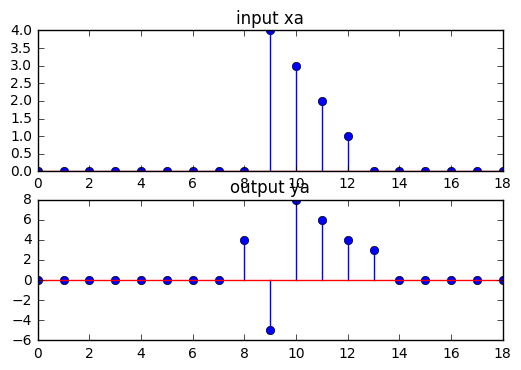

In [93]:
yb = resp3(xb)
plt.figure()
plt.subplot(2,1,1)
plt.title("input xa")
plt.stem(xb)
plt.subplot(2,1,2)
plt.title("output ya")
plt.stem(yb)

**3.2** Prove the system defined by the previous equation is linear (and invariant). Write the equation as a convolution equation.


<Container object of 3 artists>

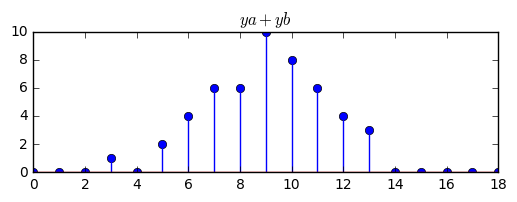

In [94]:
yab = resp3(xa + xb)

plt.figure()
plt.subplot(2,1,1)
plt.title("$ya + yb$")
plt.stem(ya + yb)


<Container object of 3 artists>

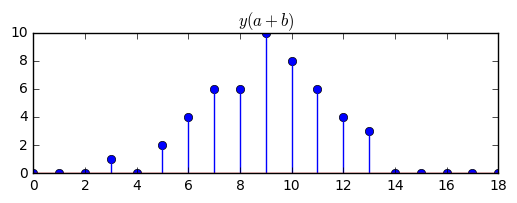

In [95]:
plt.subplot(2,1,2)
plt.title("$y(a+b)$")
plt.stem(yab)
#we have the same result so it's clear that y(a+b)=ya+yb

<Container object of 3 artists>

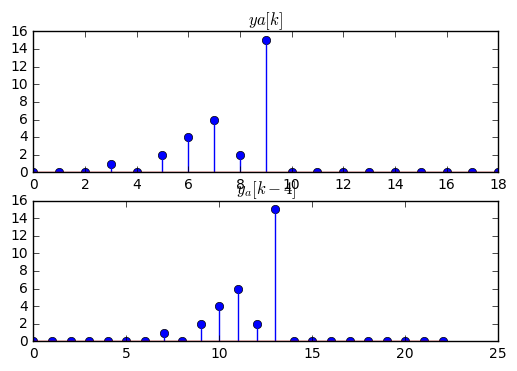

In [98]:
ya4 = resp3( np.append(np.zeros(4), xa) )
plt.figure()
plt.subplot(2,1,1)
plt.title("$ya[k]$")
plt.stem(ya)
plt.subplot(2,1,2)
plt.title("$y_a[k-4]$")
plt.stem(ya4)



In [ ]:
#if we delay the input we also delaye the output it is time invariant. 

**3.3** Propose a nonlinear/noninvariant system.

<Container object of 3 artists>

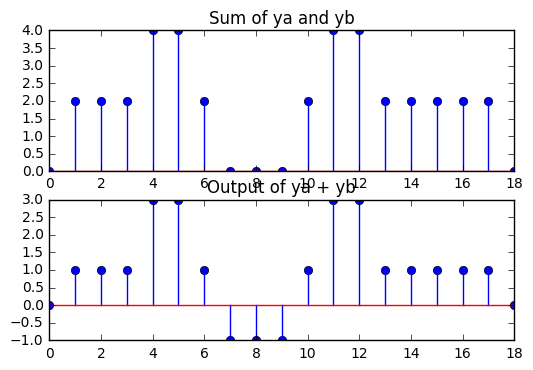

In [123]:
def system_3_3(x):
    y = x.copy();
    
    for k in range(1,y.size-1):
        y[k] = np.exp(x[k-1]/k)+3*np.sin(x[k])

    return y

ynlva = system_3_3(xa)
ynlvb = system_3_3(xb)
ynlvab = system_3_3((xa + xb))

plt.figure()
plt.subplot(2,1,1)
plt.title('Sum of ya and yb')
plt.stem(ynlva + ynlvb)
plt.subplot(2,1,2)
plt.title("Output of ya + yb")
plt.stem(ynlvab)

<Container object of 3 artists>

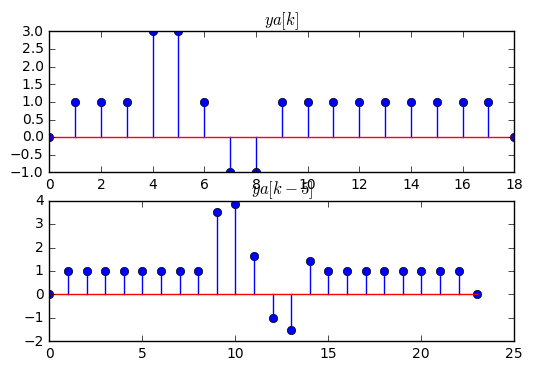

In [125]:
ynlva5 = system_3_3(np.append(np.zeros(5), xa))

plt.figure()
plt.title('clearlly variant')
plt.subplot(2,1,1)
plt.title("$ya[k]$")
plt.stem(ynlva)
plt.subplot(2,1,2)
plt.title("$ya[k-5]$")
plt.stem(ynlva5)